In [2]:
from typing import TypedDict, List 
from langgraph.graph import StateGraph,START, END

In [3]:
class State(TypedDict):
    x1 : int
    x2 : int 
    operation : str
    final_number : int
    

In [6]:
def adder(state : State) -> State:
    """Adds x1 and x2 and stores the result in final_number."""

    state['final_number'] = state['x1'] + state['x2']
    return state

def subtractor(state : State) -> State:
    """Subtracts x2 from x1 and stores the result in final_number."""

    state['final_number'] = state['x1'] - state['x2']
    return state

def decide_next_node(state : State) -> State:
    """ Decide which node to run nex """
    if state['operation'] == "+":
        return "addition_link"
    else: 
        return "subtraction_link"
    
       

In [9]:
graph = StateGraph(State)
graph.add_node("adder",adder)
graph.add_node("subtractor",subtractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START,"router")
graph.add_conditional_edges("router",decide_next_node,{"addition_link":"adder","substration_link":"subtractor"})

graph.add_edge("adder",END)
graph.add_edge("subtractor",END)

app = graph.compile()

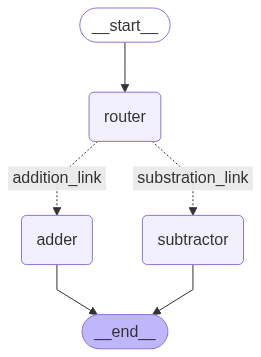

: 

In [ ]:
graph.compile()